# Nadgledano učenje

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
import seaborn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('updated_pollution_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [3]:
df.drop_duplicates(keep='first',inplace=True)
df.isnull().any()

Temperature                      False
Humidity                         False
PM2.5                            False
PM10                             False
NO2                              False
SO2                              False
CO                               False
Proximity_to_Industrial_Areas    False
Population_Density               False
Air Quality                      False
dtype: bool

Dataset nema duplikata ni nedostajućih vrednosti

## Opis karakteristika

| Karakteristika | Opis
| -------- | ------- |
| Temparatura (°C) | Prosečna temperatura vazduha |
| Vlažnost (%) | Relativna vlažnost vazduha |
| PM2.5 (µg/m³)  | Nivo prisutnosti sitnih čestica   |
| PM10 (µg/m³)  | Nivo prisutnosti krupnih čestica    |
| NO2  (ppb)  |   Koncentracija azot-dioksida  |
| S02 (ppb)   | Koncentracija sumpor-dioksida   |
| CO (ppb)   | Koncentracija ugljen-monoksida    |
| Blizina_industrije   (km) |  Daljina do najbliže industrijske zone   |
| Gustina_populacije (people/km²)   | Broj ljudi po kvadratnom kilometru    |
| Kvalitet_vazduha | Stepen zagađenosti vazduha |

## Kvalitet vazduha
* Dobar: Čist vazduh sa niskim nivoima zagađenja 
* Umeren: Prihvatljiv kvalitet vazduha, ali su prisutni neki zagađivači
* Loš: Uočljivo zagađenje koje može izazvati zdravstvene probleme kod osetljivih grupa
* Opasan: Veoma zagađen vazduh koji predstavlja ozbiljan zdravstveni rizik za populaciju

In [4]:
df = df.rename(columns={
    'Temperature':'Temperatura',
    'Humidity':'Vlažnost',
    'Air Quality': 'Kvalitet_Vazduha',
    'Proximity_to_Industrial_Areas': 'Blizina_Industrije',
    'Population_Density':'Gustina_Populacije'
})
df['Kvalitet_Vazduha'] = df['Kvalitet_Vazduha'].replace({
    'Good': 'Dobar',
    'Moderate': 'Umeren',
    'Poor': 'Loš',
    'Hazardous': 'Opasan'
})

if df['Kvalitet_Vazduha'].dtype == 'object': 
    encoder = LabelEncoder()
    df['Kvalitet_Vazduha'] = encoder.fit_transform(df['Kvalitet_Vazduha'])
df.head()

,Temperatura,Vlažnost,PM2.5,PM10,NO2,SO2,CO,Blizina_Industrije,Gustina_Populacije,Kvalitet_Vazduha
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,3
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,3
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,3
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0


In [5]:
print(encoder.classes_)

['Dobar' 'Loš' 'Opasan' 'Umeren']


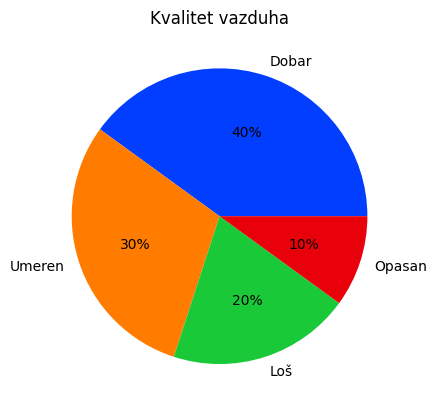

In [6]:
air_quality=df['Kvalitet_Vazduha'].value_counts()
palette_color = seaborn.color_palette('bright') 
plt.pie(air_quality.values, labels=encoder.inverse_transform(air_quality.index), colors=palette_color, autopct='%.0f%%')
plt.title("Kvalitet vazduha") 
plt.show() 

<Axes: >

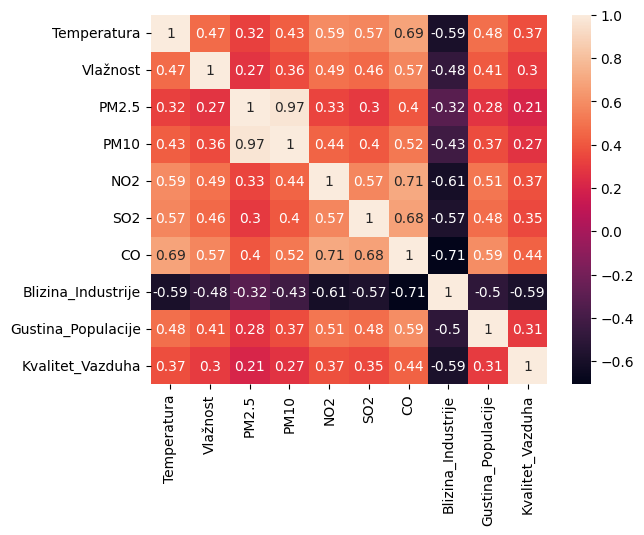

In [7]:
correlation=df.corr()
seaborn.heatmap(correlation,annot=True)

| Karakteristika | Opis
| -------- | ------- |
| Temparatura (°C) | Prosečna temperatura vazduha |
| Vlažnost (%) | Relativna vlažnost vazduha |
| Vlažnost (%)  | Nivo prisutnosti sitnih čestica   |
| PM10 (µg/m³)  | Nivo prisutnosti krupnih čestica    |
| NO2  (ppb)  |   Koncentracija azot-dioksida  |
| S02 (ppb)   | Koncentracija sumpor-dioksida   |
| CO (ppb)   | Koncentracija ugljen-monoksida    |
| Blizina_industrije   (km) |  Daljina do najbliže industrijske zone   |
| Gustina_populacije (people/km²)   | Broj ljudi po kvadratnom kilometru    |
| Kvalitet_vazduha | Stepen zagađenosti vazduha |

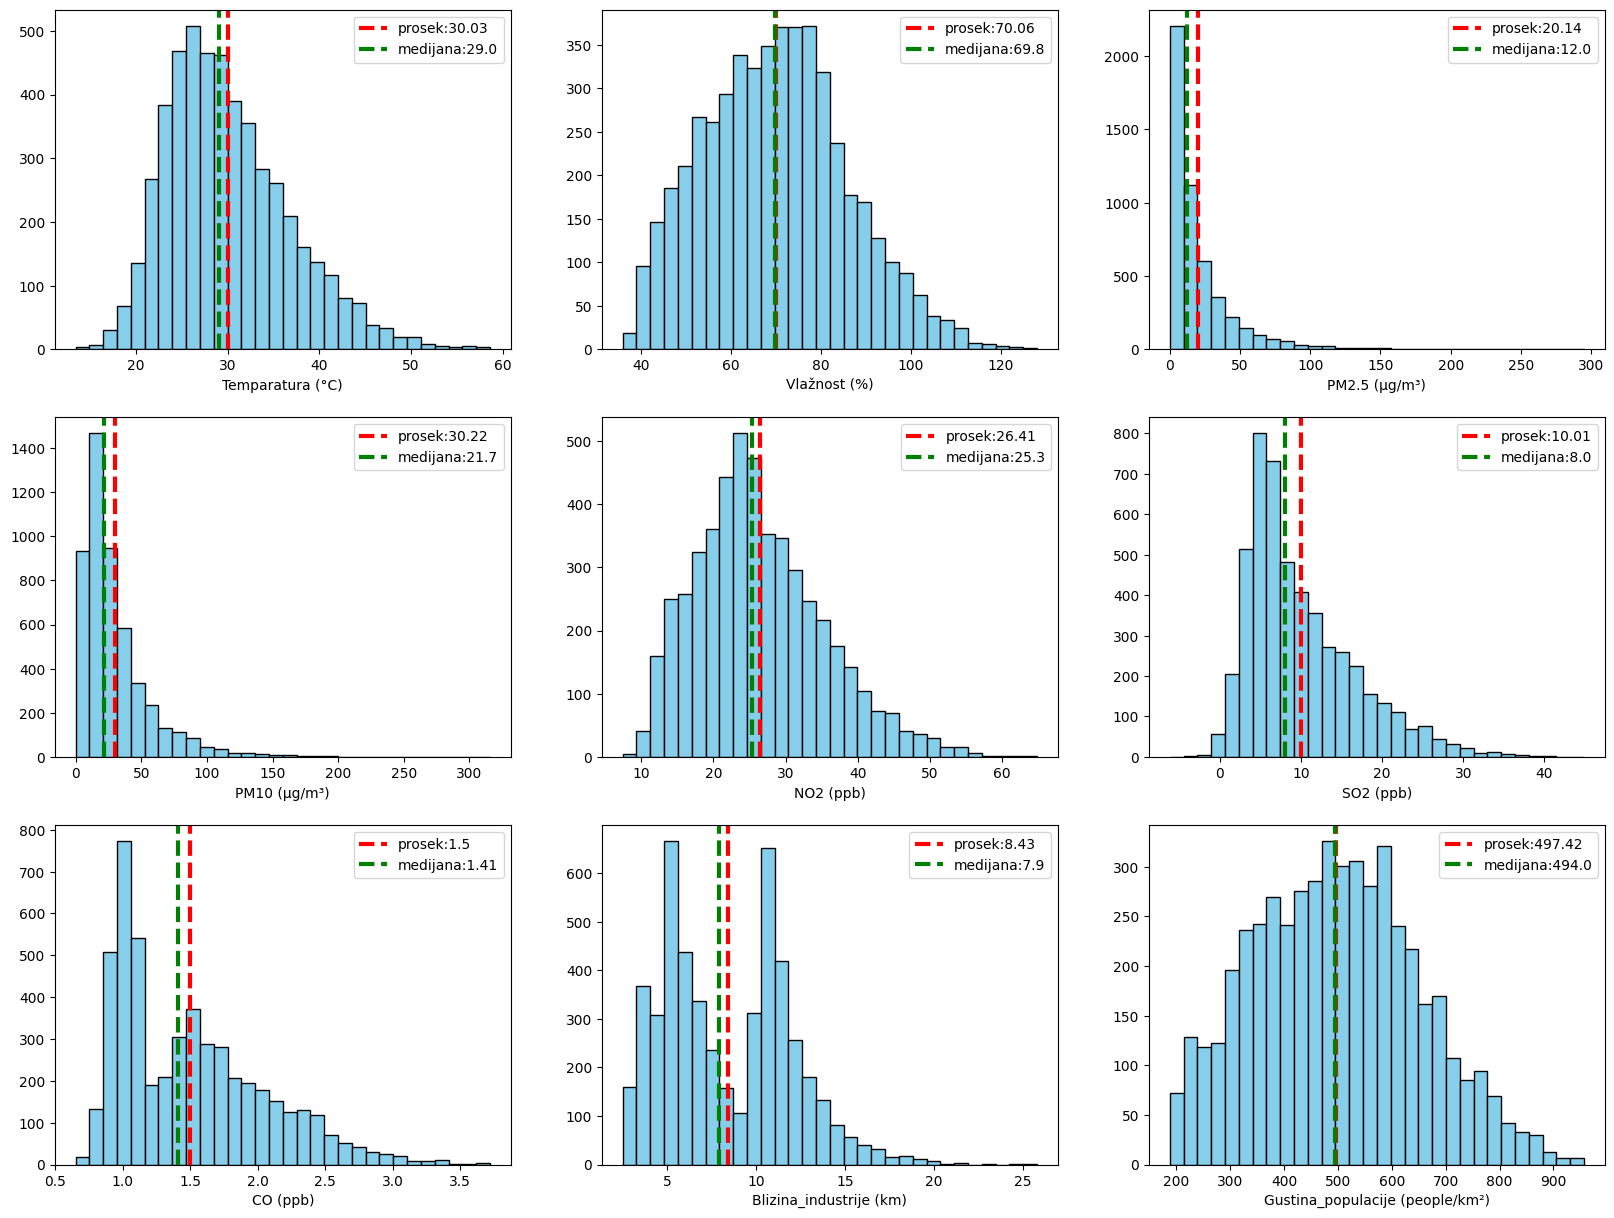

In [8]:
df_simpl=df.drop(columns='Kvalitet_Vazduha')
labels={'Temperatura':'Temparatura (°C)','Vlažnost':'Vlažnost (%)','Vlažnost':'Vlažnost (%)','PM2.5':'PM2.5 (µg/m³)',
        'PM10':'PM10 (µg/m³)','NO2':'NO2 (ppb)', 'SO2':'SO2 (ppb)','CO':'CO (ppb)',
        'Blizina_Industrije':'Blizina_industrije (km)','Gustina_Populacije':'Gustina_populacije (people/km²)',}
plt.figure(figsize=(20,15))
for ind,col in enumerate(df_simpl.columns):
    plt.subplot(3,3,ind+1)
    plt.hist(df_simpl[col], bins=30, color='skyblue', edgecolor='black')
    plt.axvline(np.round(df[col].mean(),2), color='r', linestyle='dashed', linewidth=3)
    plt.axvline(np.round(df[col].median(),2), color='g', linestyle='dashed', linewidth=3)
    plt.xlabel(labels[col])
    plt.legend([f'prosek:{np.round(df[col].mean(),2)}',f'medijana:{np.round(df[col].median(),2)}'])
plt.show()

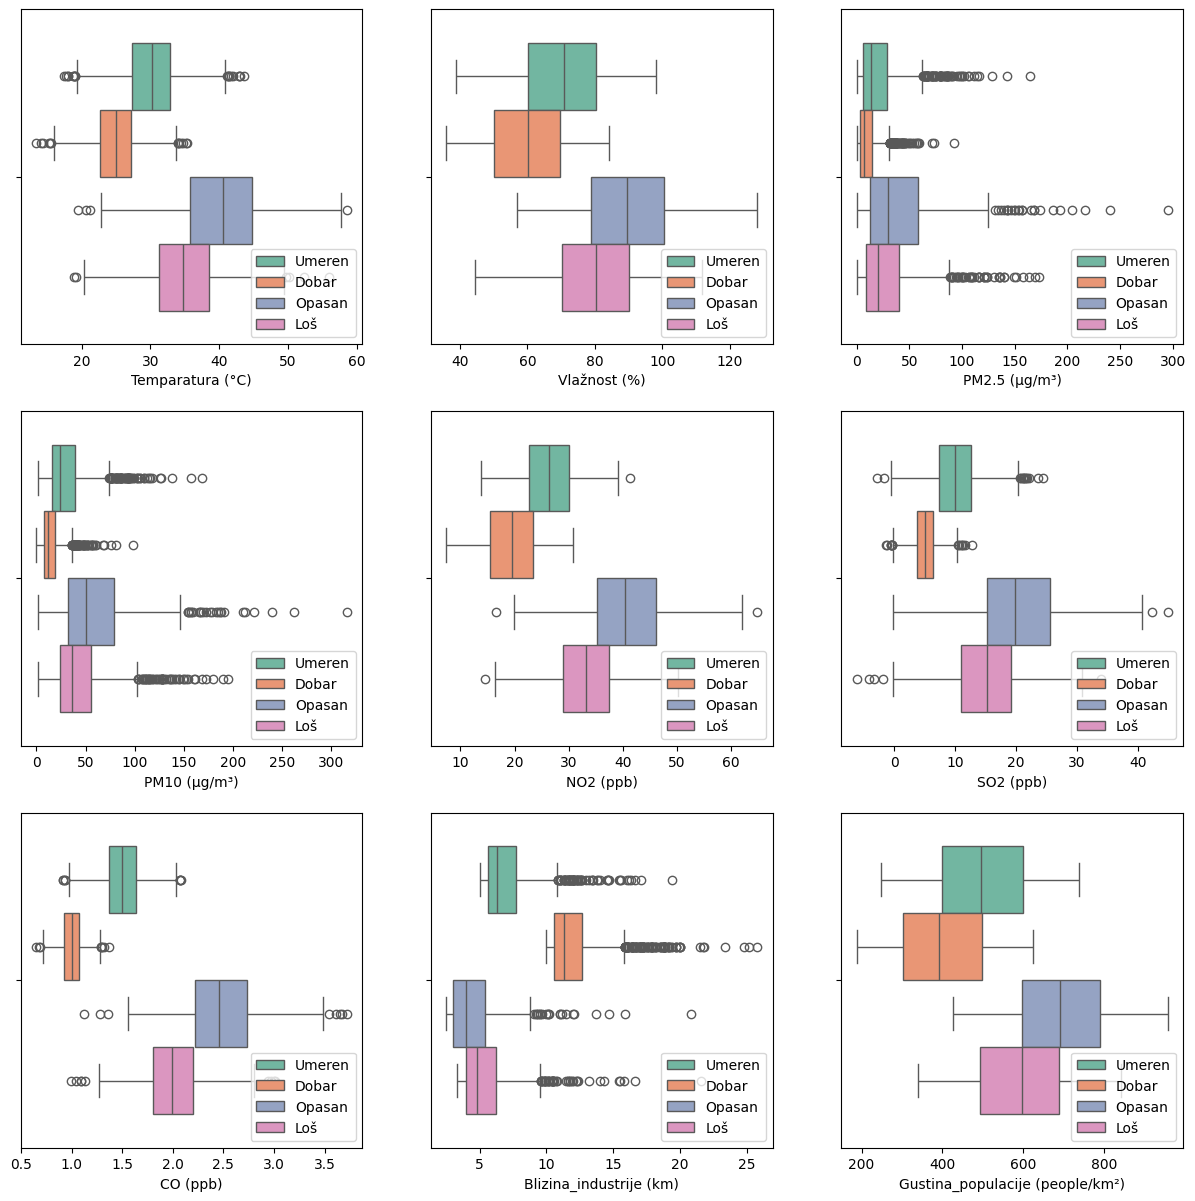

In [9]:
fig = plt.figure(figsize=(15,20))
for i, col in enumerate(df.drop('Kvalitet_Vazduha', axis=1).columns):
  plt.subplot(4,3,i+1)
  seaborn.boxplot(x = df[col],hue=encoder.inverse_transform(df['Kvalitet_Vazduha']),palette='Set2')
  plt.xlabel(labels[col])
  plt.legend(loc='lower right')

#### Outlier removal (IQR)

In [10]:
df.describe()

,Temperatura,Vlažnost,PM2.5,PM10,NO2,SO2,CO,Blizina_Industrije,Gustina_Populacije,Kvalitet_Vazduha
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800,1.300000
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084,1.268985
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000,0.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000,0.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000,1.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000,3.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000,3.000000


In [11]:
for col in df.columns:
    Q1=np.quantile(df[col],0.25)
    Q3=np.quantile(df[col],0.75)
    IQR=Q3-Q1
    low_lim=Q1-IQR*1.5
    up_lim=Q3+IQR*1.5
    df=df[(df[col]>=low_lim)&(df[col]<=up_lim)]

In [12]:
df.describe()

,Temperatura,Vlažnost,PM2.5,PM10,NO2,SO2,CO,Blizina_Industrije,Gustina_Populacije,Kvalitet_Vazduha
count,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000
mean,28.624291,67.458923,13.477321,22.153054,24.444877,8.417629,1.358680,9.002646,469.990620,1.213324
std,5.638813,14.604439,12.096149,14.047948,7.418979,5.023425,0.423952,3.419490,139.874008,1.337437
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000,0.000000
25%,24.500000,56.100000,3.900000,11.100000,19.000000,4.700000,1.010000,5.800000,362.000000,0.000000
50%,27.800000,67.500000,9.800000,18.600000,23.900000,7.100000,1.235000,10.100000,470.000000,1.000000
75%,32.100000,77.700000,19.600000,30.300000,29.100000,11.400000,1.650000,11.300000,573.000000,3.000000
max,47.300000,111.800000,56.600000,63.700000,46.700000,23.200000,2.630000,19.400000,861.000000,3.000000


#### Pomoćne funkcije

In [13]:
from sklearn.metrics import confusion_matrix
from IPython.display import display_html

def createConfusionMatrix(target_test,target_predicted):
    matrix = confusion_matrix(np.asarray(target_test),np.asarray(target_predicted))
    class_names=encoder.inverse_transform([0,1,2,3])
    dataframe=pd.DataFrame(matrix,index=class_names,columns=class_names)

    seaborn.heatmap(data=dataframe,annot=True,cbar=None,cmap='Blues',fmt='.0f')
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.ylabel("True class")
    plt.xlabel("Predicted class")
    plt.show()
    return dataframe

def createTableReport(report_dict:dict):
    accuracy = report_dict.pop('accuracy')
    df_report = pd.DataFrame(report_dict).transpose()
    
    accuracy_row = pd.Series({'precision': None, 'recall': None, 'f1-score': accuracy, 'support': None}, name='accuracy')
    df_report = pd.concat([df_report, accuracy_row.to_frame().transpose()])
    df_report.round(4)

    return df_report.style.background_gradient(cmap='Blues')

def showReports(dfs,titles):
    htmls = []
    for df, title in zip(dfs, titles):
        html = f"<h4>{title}</h4>" + df.to_html()
        htmls.append(html)

    display_html(''.join(
        f'<div style="display:inline-block; vertical-align:top;text-align:center; padding:6px;">{html}</div>'
        for html in htmls
    ), raw=True)

## Modeli bez transformacije

### Dummy Classification Model

,precision,recall,f1-score,support
Dobar,0.488636,0.521212,0.504399,495.000000
Loš,0.208589,0.194286,0.201183,175.000000
Opasan,0.000000,0.000000,0.000000,22.000000
Umeren,0.326347,0.313218,0.319648,348.000000
macro avg,0.255893,0.257179,0.256308,1040.000000
weighted avg,0.376872,0.385577,0.380887,1040.000000
accuracy,nan,nan,0.385577,nan


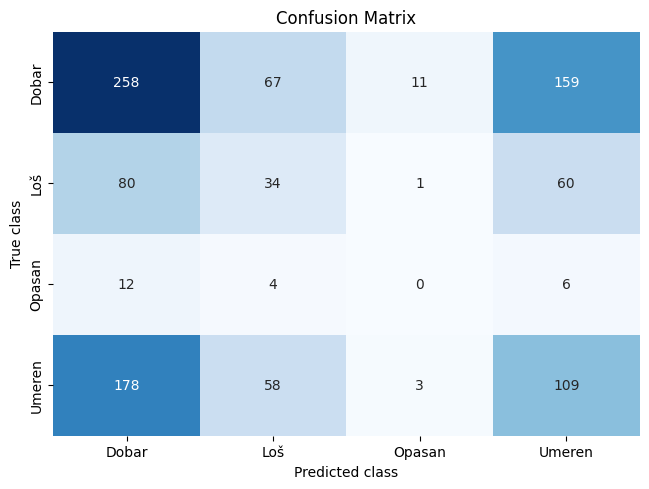

In [14]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

features,target=df.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target) #train_size 0.25
dummy=DummyClassifier(strategy='stratified',random_state=0)
target_predicted=dummy.fit(features_train,target_train).predict(features_test)

report_dummy = createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,output_dict=True))
display(report_dummy)
conf_matrix_dummy=createConfusionMatrix(target_test,target_predicted)

* Preciznost, odziv i F1 su veoma niski za sve klase skupa podataka
* Veliki broj pogrešno identifikovanih klasa, uz naglađenje da nijedna predikcija za klasu "Opasan" nije bila tačna
* *Zaključak:* Ne koristiti ovaj model, služi samo kao standard za poređenje

### Logistic regression

c:\Users\marko\anaconda3\envs\ml\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,precision,recall,f1-score,support
Dobar,0.955513,0.997980,0.976285,495.000000
Loš,0.566038,0.514286,0.538922,175.000000
Opasan,0.242424,0.727273,0.363636,22.000000
Umeren,0.882550,0.755747,0.814241,348.000000
macro avg,0.661631,0.748821,0.673271,1040.000000
weighted avg,0.850477,0.829808,0.835508,1040.000000
accuracy,nan,nan,0.829808,nan


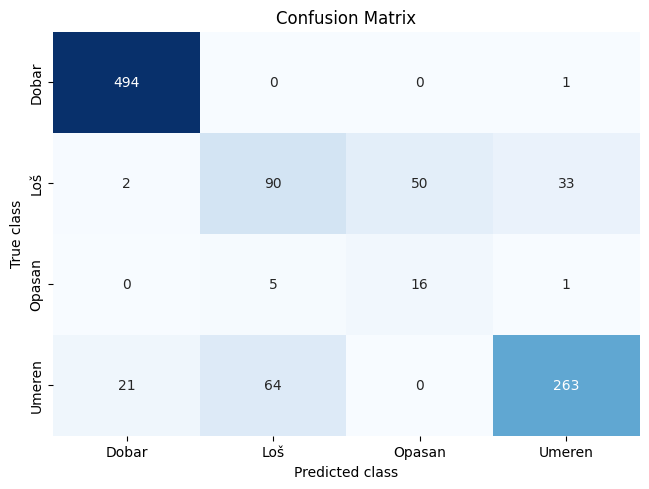

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

features,target=df.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target) 

# Fit logistic regression (multi-class)
model = LogisticRegression(solver='saga', max_iter=5000,class_weight='balanced',random_state=0)
model.fit(features_train, target_train)

# Predictions
target_pred = model.predict(features_test)

# Evaluation
report_lr=createTableReport(classification_report(target_test, target_pred, target_names=encoder.classes_,output_dict=True))
display(report_lr)
conf_matrix_lr = createConfusionMatrix(target_test,target_pred)

* Odlična preciznost i odziv za klase "Dobar" i "Umeren"
* Slaba preciznost za klasu "Opasan" (veliki broj lažno pozitivnih predviđanja)
* *Zaključak:* Bolja predikcija pojedinih klasa, dok se to ne može reći za ključnu "Opasan" klasu

### Random forest model

,precision,recall,f1-score,support
Dobar,0.995976,1.000000,0.997984,495.000000
Loš,0.902299,0.897143,0.899713,175.000000
Opasan,1.000000,0.454545,0.625000,22.000000
Umeren,0.949861,0.979885,0.964639,348.000000
macro avg,0.962034,0.832893,0.871834,1040.000000
weighted avg,0.964867,0.964423,0.962400,1040.000000
accuracy,nan,nan,0.964423,nan


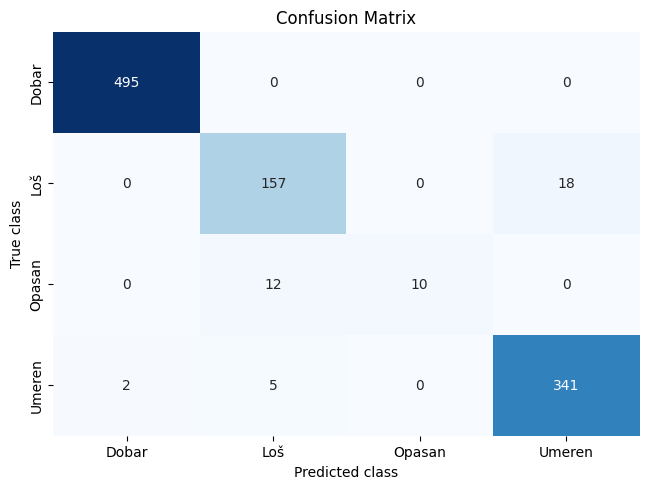

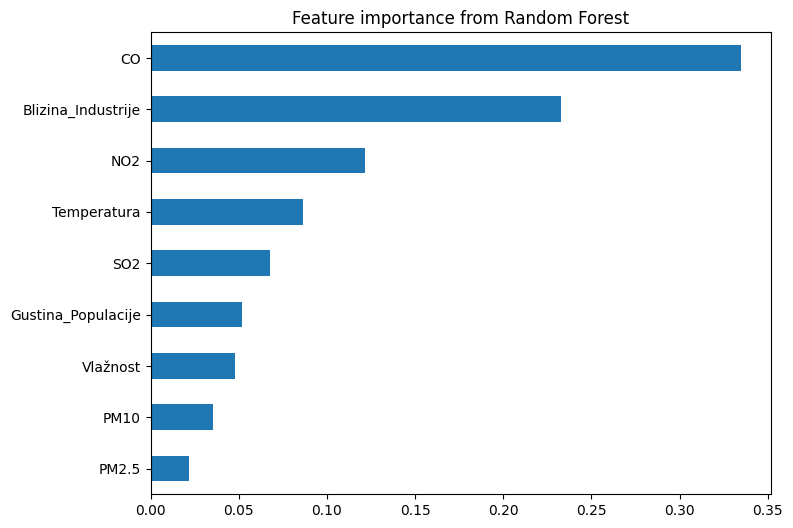

In [16]:
from sklearn.ensemble import RandomForestClassifier

features,target=df.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

rf = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=0
)
rf.fit(features_train, target_train)
target_predicted = rf.predict(features_test)

report_rf=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,output_dict=True))
display(report_rf)
conf_matrix_rf=createConfusionMatrix(target_test,target_predicted)

feat_importance = pd.Series(rf.feature_importances_, index=features_train.columns)
feat_importance.sort_values().plot(kind='barh', figsize=(8,6))
plt.title('Feature importance from Random Forest')
plt.show()

* Visoka vrednost F1 za većinu klasa
* Nizak odziv za klasu "Opasan", s time da je pogrešna predikcija bila klasa "Loš"
* Na osnovu analize karakteristika koje su najviše uticale na stablo odlučivanja možemo videti da se tu izdvojile CO i Blizina Industrije, kao neke osobine koje smo i očekivale da se pojave
* *Zaključak:* Najbolje ukupne metrike nekog modela, bez skaliranja ulaznog skupa podataka

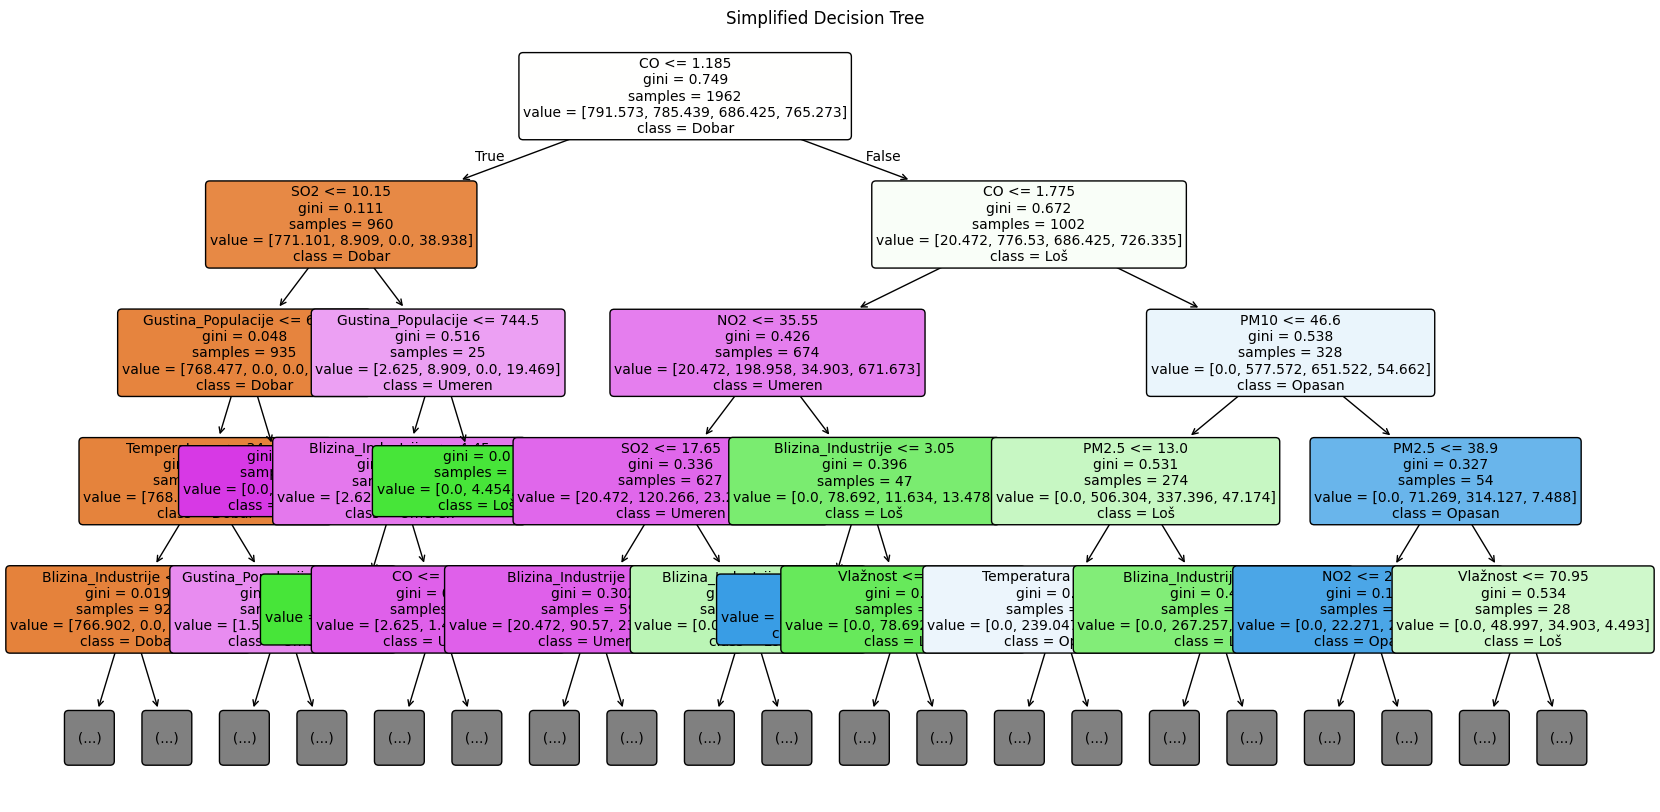

In [17]:
from sklearn.tree import plot_tree
estimator = rf.estimators_[1]

plt.figure(figsize=(20,10))
plot_tree(estimator,
          feature_names=features.columns,
          class_names=encoder.classes_,
          max_depth=4,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Simplified Decision Tree")
plt.show()

### Support Vector Machine

,precision,recall,f1-score,support
Dobar,0.875696,0.953535,0.912959,495.000000
Loš,0.712644,0.354286,0.473282,175.000000
Opasan,1.000000,0.000000,0.000000,22.000000
Umeren,0.661836,0.787356,0.719160,348.000000
macro avg,0.812544,0.523794,0.526350,1040.000000
weighted avg,0.779328,0.776923,0.754814,1040.000000
accuracy,nan,nan,0.776923,nan


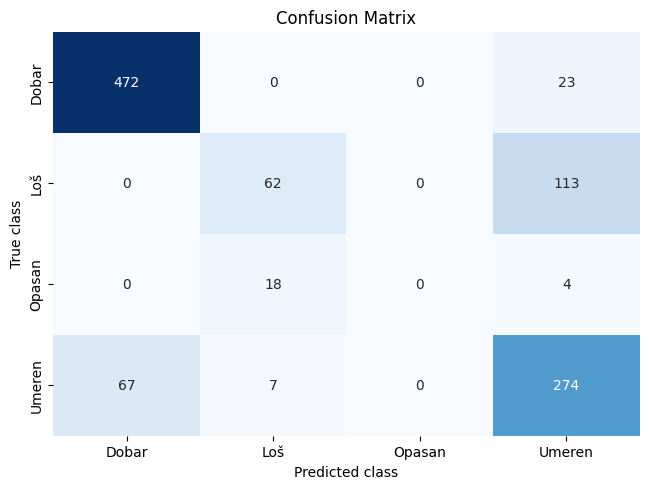

In [18]:
from sklearn.svm import SVC

features,target=df.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

clf = SVC(kernel='rbf',decision_function_shape='ovo') #ovr ili ovo

clf.fit(features_train, target_train)

target_predicted = clf.predict(features_test)

report_svc=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,zero_division=1,output_dict=True))
display(report_svc)
conf_matrix_svc=createConfusionMatrix(target_test,target_predicted)

* Generalno dobri rezultati za klasu "Dobar"
* Odziv za klasu "Opasan" je 0, dakle nijedno predviđanje nije bilo tačno
* Klasa "Loš" je imala niske vrednosti za odziv i F1
* *Zaključak:* Model je dao bolje rezultate od Dummy Classifier-a i Logistic Regression, ali ne i od Random Forest-a

### Multinomial Naive Bayes

,precision,recall,f1-score,support
Dobar,0.761450,0.812627,0.786207,491.000000
Loš,0.650350,0.534483,0.586751,174.000000
Opasan,1.000000,0.045455,0.086957,22.000000
Umeren,0.586301,0.618497,0.601969,346.000000
macro avg,0.749525,0.502765,0.515471,1033.000000
weighted avg,0.689151,0.684414,0.676008,1033.000000
accuracy,nan,nan,0.684414,nan


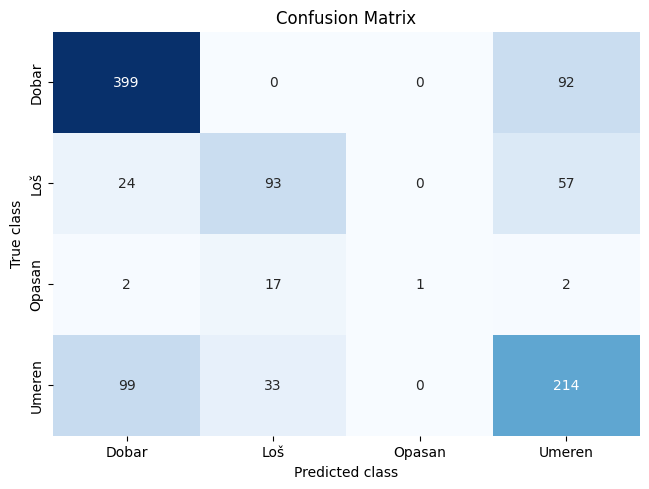

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay


#Uklanjanje redova koje imaju negativne vrednosti karakteristika
df_cleaned = df[(df >= 0).all(axis=1)]

features,target=df_cleaned.drop('Kvalitet_Vazduha',axis=1),df_cleaned['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

nb = MultinomialNB()

nb.fit(features_train, target_train)

target_predicted = nb.predict(features_test)

report_nb=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,zero_division=1,output_dict=True))
display(report_nb)
conf_matrix_nb=createConfusionMatrix(target_test,target_predicted)

* Izuzetvo loš odziv za klasu "Opasan", svega jedno tačno predviđanje
* F1 rezultat za klasu "Opasan" je veoma niska
* Slaba robusnost kod nebalansiranih skupova podataka
* *Zaključak:* Model je dao veoma loše rezultate, jedva nešto bolji od Dummy Classifier-a

### Pregled modela

* **Random Forest** dao najbolje performanse po svima klasama, kao i koliko-toliko pristojne rezultate za "Opasan" klasu
* "Dobar" i "Umeren" klase su klasifikovane sa visokom tačnošću kod svih modela usled velike podrške
* Klasa "Opasan" se pokazala kao najproblematičnija usled malog broja primera - svi modeli imaju nizak odziv i F1-score

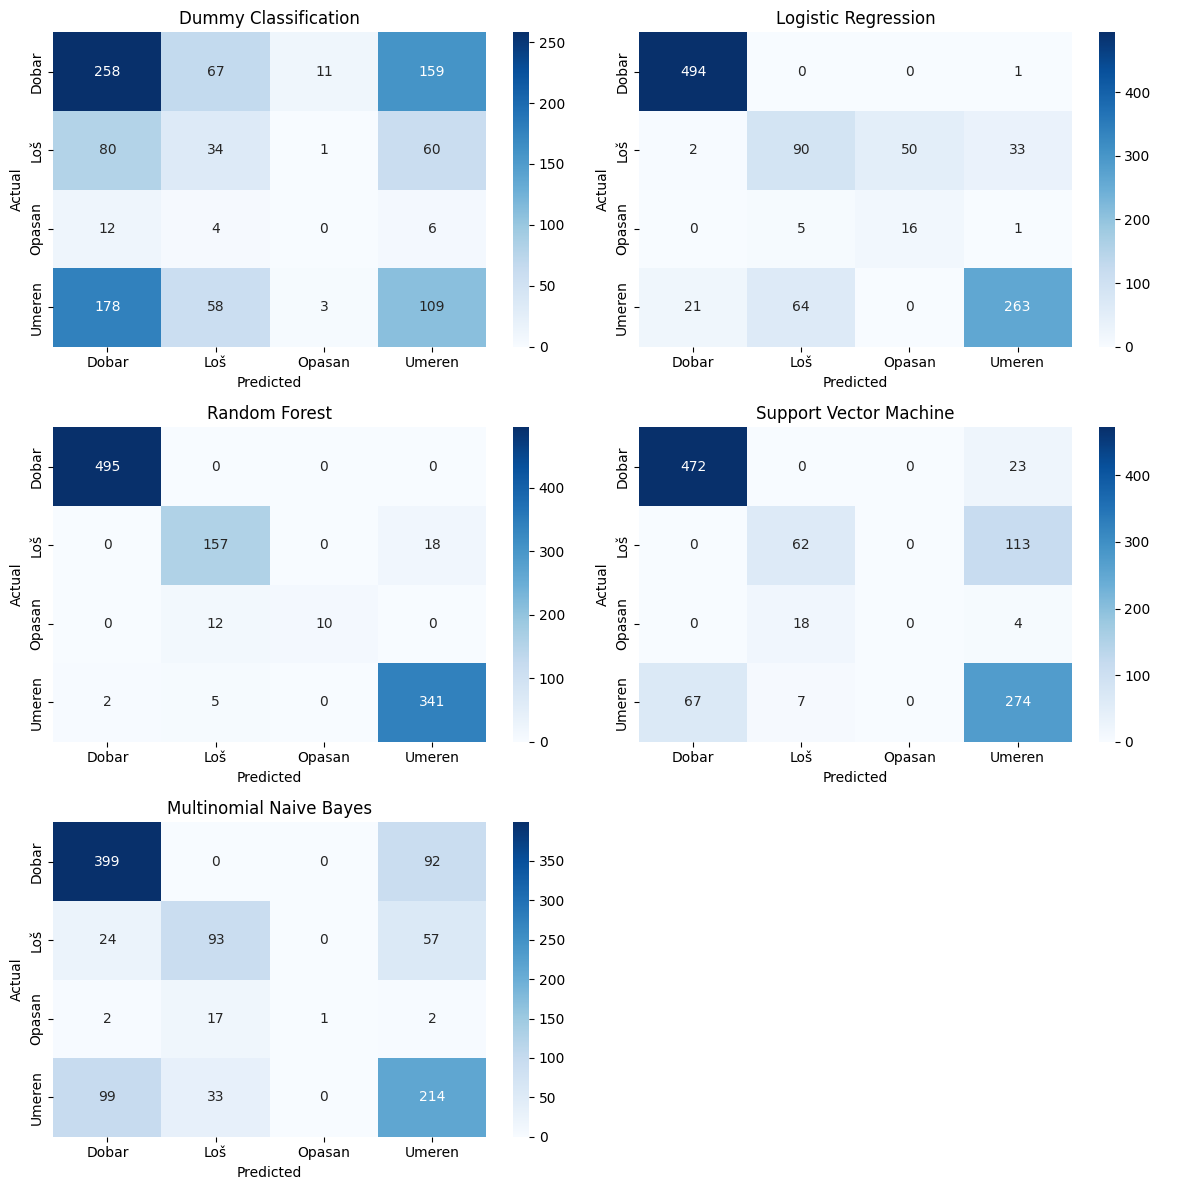

In [20]:
conf_matrixs = {"Dummy Classification":conf_matrix_dummy, "Logistic Regression":conf_matrix_lr,"Random Forest":conf_matrix_rf,
                "Support Vector Machine":conf_matrix_svc,"Multinomial Naive Bayes":conf_matrix_nb}

fig, axes = plt.subplots(3, 2, figsize=(12, 12))  # 3 reda x 2 kolone
axes = axes.flatten()  # flatten to make it easier to index

for idx, (model_name, conf) in enumerate(conf_matrixs.items()):
    #seaborn.heatmap(data=conf,annot=True,cbar=None,cmap='Blues',fmt='.0f')
    seaborn.heatmap(conf, annot=True,cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(model_name)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrixs), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Modeli sa transformacijom

### MinMax i Standard transofrmacija

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

std_scaler = StandardScaler()
features=df.drop('Kvalitet_Vazduha',axis=1)

data_scalled = std_scaler.fit_transform(features)
df_std = pd.DataFrame(data_scalled, columns=features.columns, index=features.index)
df_std['Kvalitet_Vazduha']=df['Kvalitet_Vazduha']

minmax_scaler = MinMaxScaler()
data_scalled = minmax_scaler.fit_transform(features)
df_minmax = pd.DataFrame(data_scalled, columns=features.columns, index=features.index)
df_minmax['Kvalitet_Vazduha']=df['Kvalitet_Vazduha']

### Logistic Regression

c:\Users\marko\anaconda3\envs\ml\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,precision,recall,f1-score,support
Dobar,0.989980,0.997980,0.993964,495.000000
Loš,0.832215,0.708571,0.765432,175.000000
Opasan,0.326923,0.772727,0.459459,22.000000
Umeren,0.950000,0.928161,0.938953,348.000000
macro avg,0.774779,0.851860,0.789452,1040.000000
weighted avg,0.936029,0.921154,0.925795,1040.000000
accuracy,nan,nan,0.921154,nan


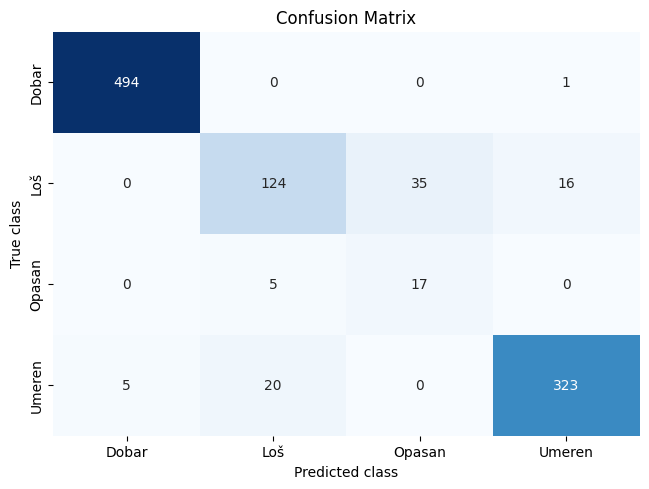

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

features,target=df_std.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target) 

# Fit logistic regression (multi-class)
model = LogisticRegression(solver='saga',max_iter=5000, class_weight='balanced',random_state=0)
model.fit(features_train, target_train)

# Predictions
target_predicted = model.predict(features_test)

# Evaluation
report_lr_std=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,output_dict=True))
display(report_lr_std)
conf_matrix_lr_std = createConfusionMatrix(target_test,target_predicted)

c:\Users\marko\anaconda3\envs\ml\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,precision,recall,f1-score,support
Dobar,0.984095,1.000000,0.991984,495.000000
Loš,0.786885,0.822857,0.804469,175.000000
Opasan,0.447368,0.772727,0.566667,22.000000
Umeren,0.968354,0.879310,0.921687,348.000000
macro avg,0.796676,0.868724,0.821202,1040.000000
weighted avg,0.934290,0.925000,0.927911,1040.000000
accuracy,nan,nan,0.925000,nan


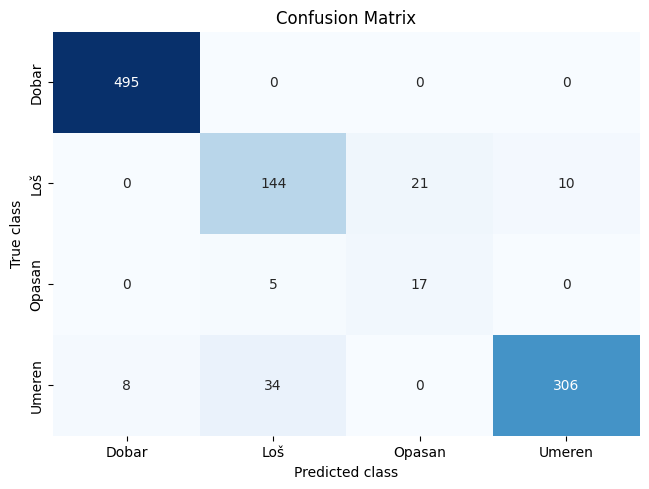

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

features,target=df_minmax.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target) 

# Fit logistic regression (multi-class)
model = LogisticRegression(solver='saga',max_iter=5000, class_weight='balanced',random_state=0)
model.fit(features_train, target_train)

# Predictions
target_predicted = model.predict(features_test)

# Evaluation
report_lr_minmax=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,output_dict=True))
display(report_lr_minmax)
conf_matrix_lr_minmax = createConfusionMatrix(target_test,target_predicted)

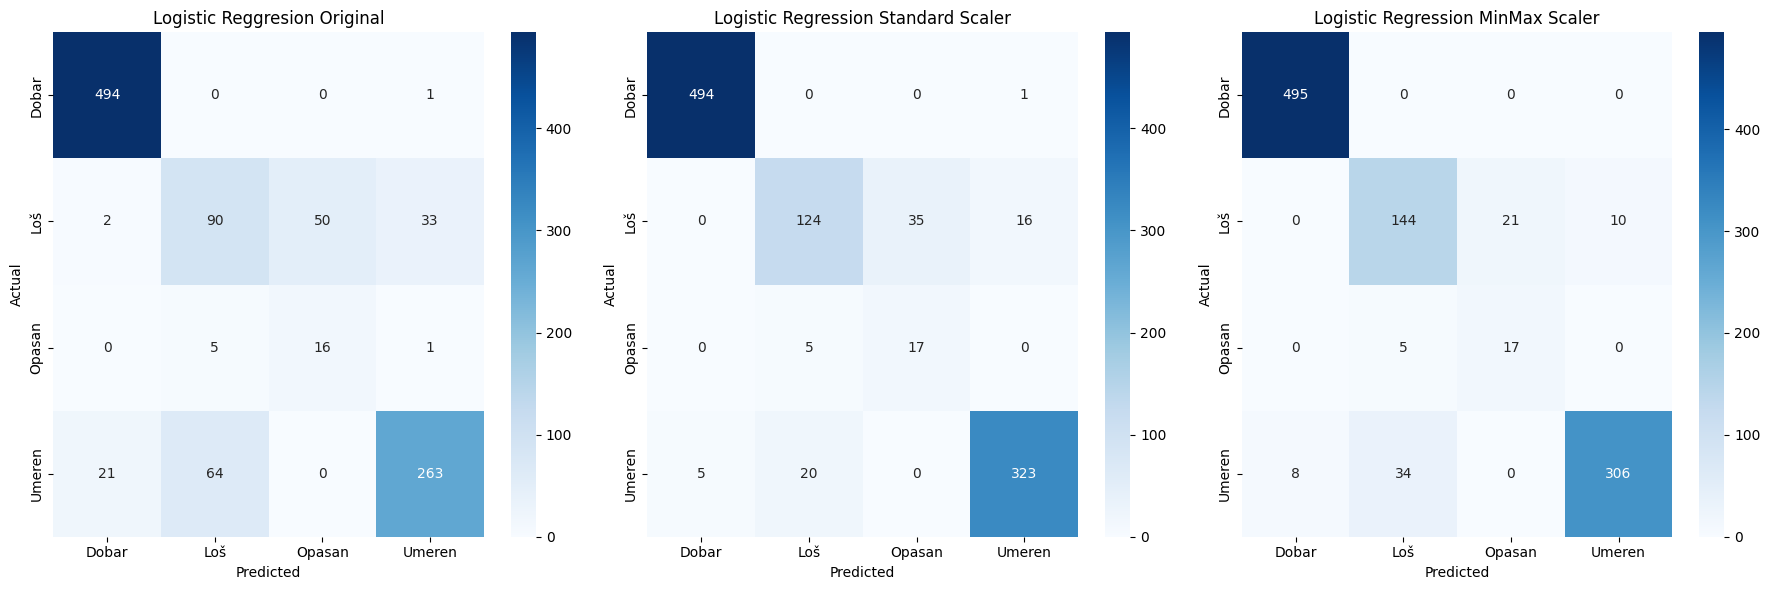

In [24]:
conf_matrixs = {"Logistic Reggresion Original":conf_matrix_lr, "Logistic Regression Standard Scaler":conf_matrix_lr_std,"Logistic Regression MinMax Scaler":conf_matrix_lr_minmax}
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 3 reda x 1 kolona
axes = axes.flatten()  # flatten to make it easier to index

for idx, (model_name, conf) in enumerate(conf_matrixs.items()):
    #seaborn.heatmap(data=conf,annot=True,cbar=None,cmap='Blues',fmt='.0f')
    seaborn.heatmap(conf, annot=True,cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(model_name)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrixs), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [25]:
showReports(dfs=[report_lr, report_lr_std, report_lr_minmax],titles=['Original','Standard Scaled', 'MinMax Scaled'])

,precision,recall,f1-score,support
Dobar,0.955513,0.997980,0.976285,495.000000
Loš,0.566038,0.514286,0.538922,175.000000
Opasan,0.242424,0.727273,0.363636,22.000000
Umeren,0.882550,0.755747,0.814241,348.000000
macro avg,0.661631,0.748821,0.673271,1040.000000
weighted avg,0.850477,0.829808,0.835508,1040.000000
accuracy,nan,nan,0.829808,nan
,precision,recall,f1-score,support
Dobar,0.989980,0.997980,0.993964,495.000000
Loš,0.832215,0.708571,0.765432,175.000000


* Logistic Regression nad skaliranim skupom podataka dao je bolje rezultate
* Preciznost svih klasa se povećala kod Standardnog skaliranja, dok se dodatno povećala kod MinMax skaliranja
* Značajno poboljšanje detekcije klase "Loš" kod oba skaliranja
* *Zaključak:* Modifikacija skupa podataka ovom modelu omogućila bolju predikciju

### Random Forest

,precision,recall,f1-score,support
Dobar,0.995976,1.000000,0.997984,495.000000
Loš,0.902299,0.897143,0.899713,175.000000
Opasan,1.000000,0.454545,0.625000,22.000000
Umeren,0.949861,0.979885,0.964639,348.000000
macro avg,0.962034,0.832893,0.871834,1040.000000
weighted avg,0.964867,0.964423,0.962400,1040.000000
accuracy,nan,nan,0.964423,nan


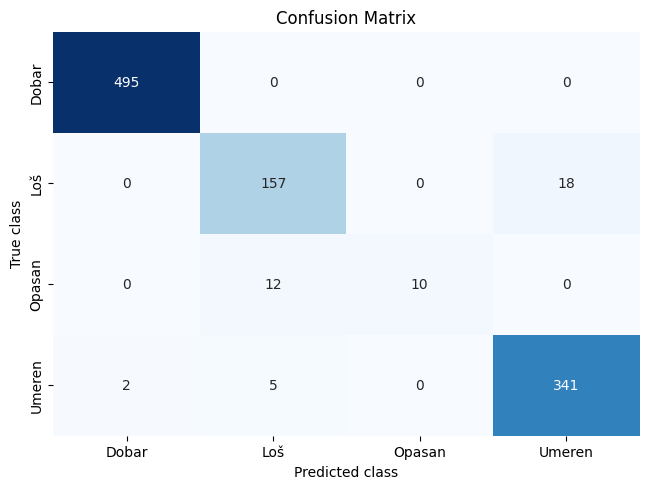

In [26]:
from sklearn.ensemble import RandomForestClassifier

features,target=df_std.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

rf = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=0
)
rf.fit(features_train, target_train)
target_predicted = rf.predict(features_test)

report_rf_std=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,output_dict=True))
display(report_rf_std)
conf_matrix_rf_std=createConfusionMatrix(target_test,target_predicted)

,precision,recall,f1-score,support
Dobar,0.995976,1.000000,0.997984,495.000000
Loš,0.903409,0.908571,0.905983,175.000000
Opasan,1.000000,0.454545,0.625000,22.000000
Umeren,0.955182,0.979885,0.967376,348.000000
macro avg,0.963642,0.835750,0.874086,1040.000000
weighted avg,0.966835,0.966346,0.964371,1040.000000
accuracy,nan,nan,0.966346,nan


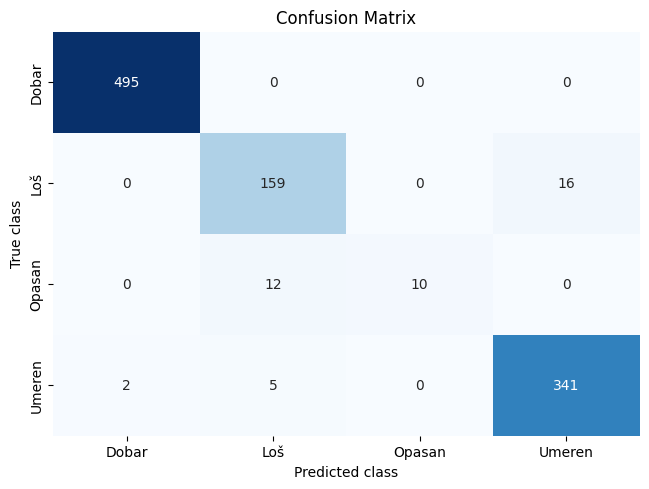

In [27]:
from sklearn.ensemble import RandomForestClassifier

features,target=df_minmax.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

rf = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=0
)
rf.fit(features_train, target_train)
target_predicted = rf.predict(features_test)

report_rf_minmax=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,output_dict=True))
display(report_rf_minmax)
conf_matrix_rf_minmax=createConfusionMatrix(target_test,target_predicted)

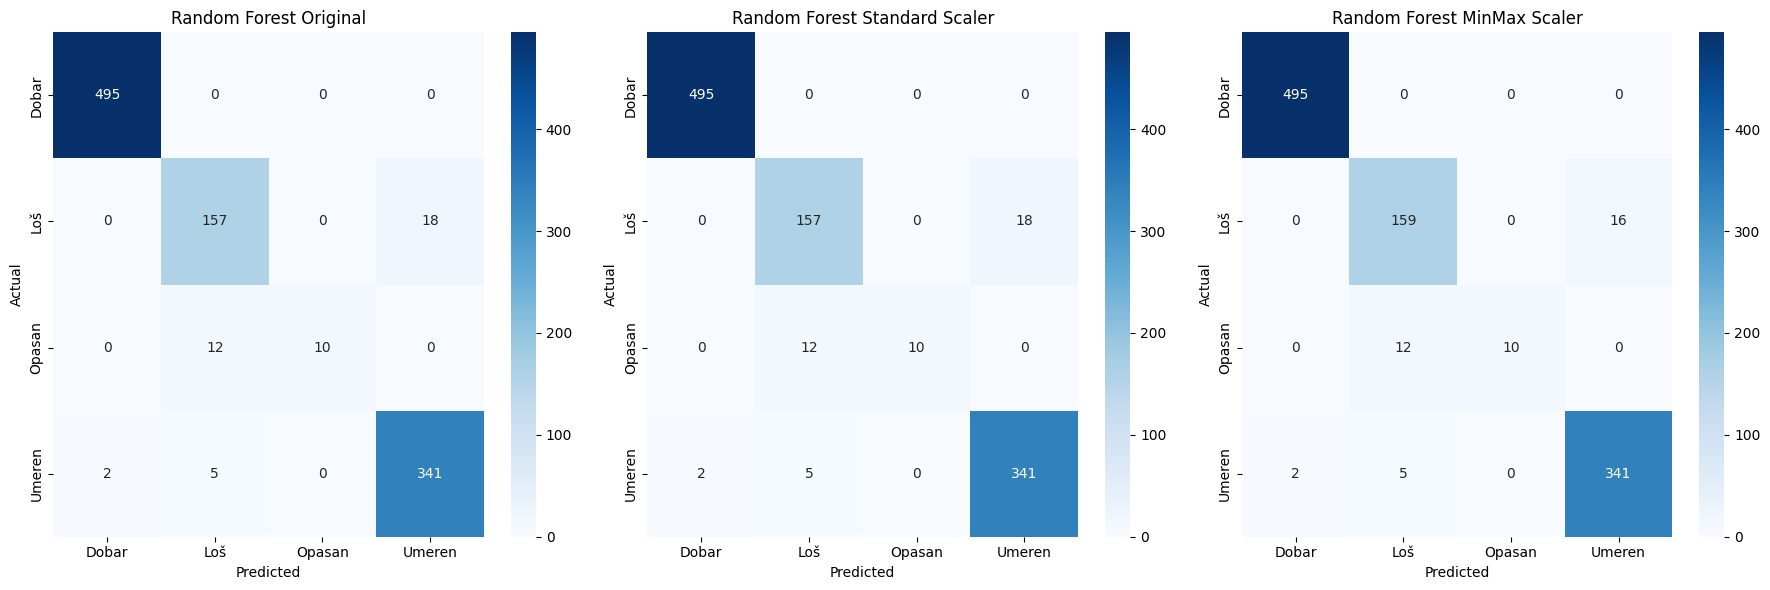

In [28]:
conf_matrixs = {"Random Forest Original":conf_matrix_rf, "Random Forest Standard Scaler":conf_matrix_rf_std,"Random Forest MinMax Scaler":conf_matrix_rf_minmax}
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 3 reda x 1 kolona
axes = axes.flatten()  # flatten to make it easier to index

for idx, (model_name, conf) in enumerate(conf_matrixs.items()):
    #seaborn.heatmap(data=conf,annot=True,cbar=None,cmap='Blues',fmt='.0f')
    seaborn.heatmap(conf, annot=True,cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(model_name)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrixs), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [29]:
showReports(dfs=[report_rf, report_rf_std, report_rf_minmax],titles=['Original','Standard Scaled', 'MinMax Scaled'])

,precision,recall,f1-score,support
Dobar,0.995976,1.000000,0.997984,495.000000
Loš,0.902299,0.897143,0.899713,175.000000
Opasan,1.000000,0.454545,0.625000,22.000000
Umeren,0.949861,0.979885,0.964639,348.000000
macro avg,0.962034,0.832893,0.871834,1040.000000
weighted avg,0.964867,0.964423,0.962400,1040.000000
accuracy,nan,nan,0.964423,nan
,precision,recall,f1-score,support
Dobar,0.995976,1.000000,0.997984,495.000000
Loš,0.902299,0.897143,0.899713,175.000000


* Odziv kod klase "Loš" je blago porastao dok se drugi rezultati gotovo nisu menjali
* *Zaključak:* Random Forest je dao najbolje rezultate predikcije, s time da se može dodatno poboljšati uz MinMax skaliranje

### Support Vector Machine

,precision,recall,f1-score,support
Dobar,0.995976,1.000000,0.997984,495.000000
Loš,0.905882,0.880000,0.892754,175.000000
Opasan,1.000000,0.454545,0.625000,22.000000
Umeren,0.942149,0.982759,0.962025,348.000000
macro avg,0.961002,0.829326,0.869441,1040.000000
weighted avg,0.962890,0.962500,0.960355,1040.000000
accuracy,nan,nan,0.962500,nan


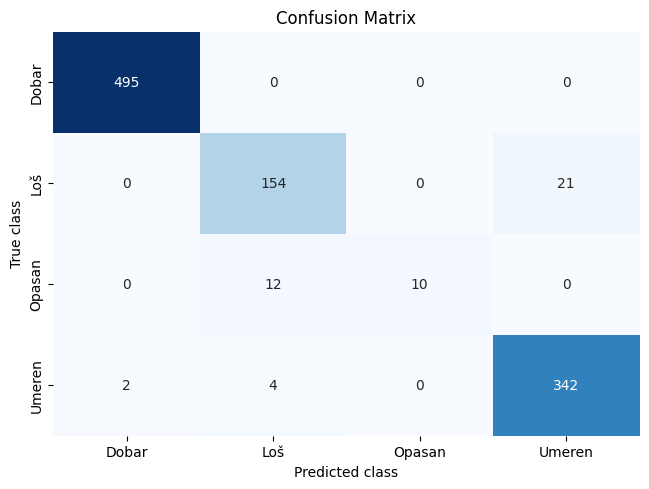

In [30]:
from sklearn.svm import SVC

features,target=df_std.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

clf = SVC(kernel='rbf',decision_function_shape='ovo') #ovr ili ovo

clf.fit(features_train, target_train)

target_predicted = clf.predict(features_test)

report_svc_std=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,zero_division=1,output_dict=True))
display(report_svc_std)
conf_matrix_svc_std=createConfusionMatrix(target_test,target_predicted)

,precision,recall,f1-score,support
Dobar,0.993976,1.000000,0.996979,495.000000
Loš,0.906433,0.885714,0.895954,175.000000
Opasan,1.000000,0.454545,0.625000,22.000000
Umeren,0.944598,0.979885,0.961918,348.000000
macro avg,0.961252,0.830036,0.869963,1040.000000
weighted avg,0.962850,0.962500,0.960379,1040.000000
accuracy,nan,nan,0.962500,nan


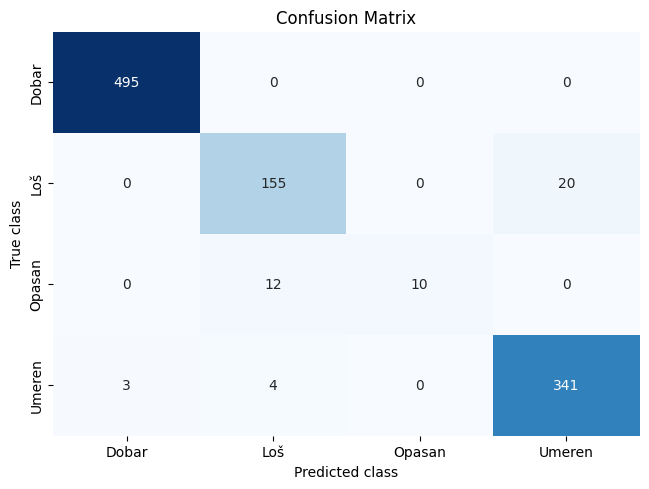

In [31]:
from sklearn.svm import SVC

features,target=df_minmax.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

clf = SVC(kernel='rbf',decision_function_shape='ovo') #ovr ili ovo

clf.fit(features_train, target_train)

target_predicted = clf.predict(features_test)

report_svc_minmax=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,zero_division=1,output_dict=True))
display(report_svc_minmax)
conf_matrix_svc_minmax=createConfusionMatrix(target_test,target_predicted)

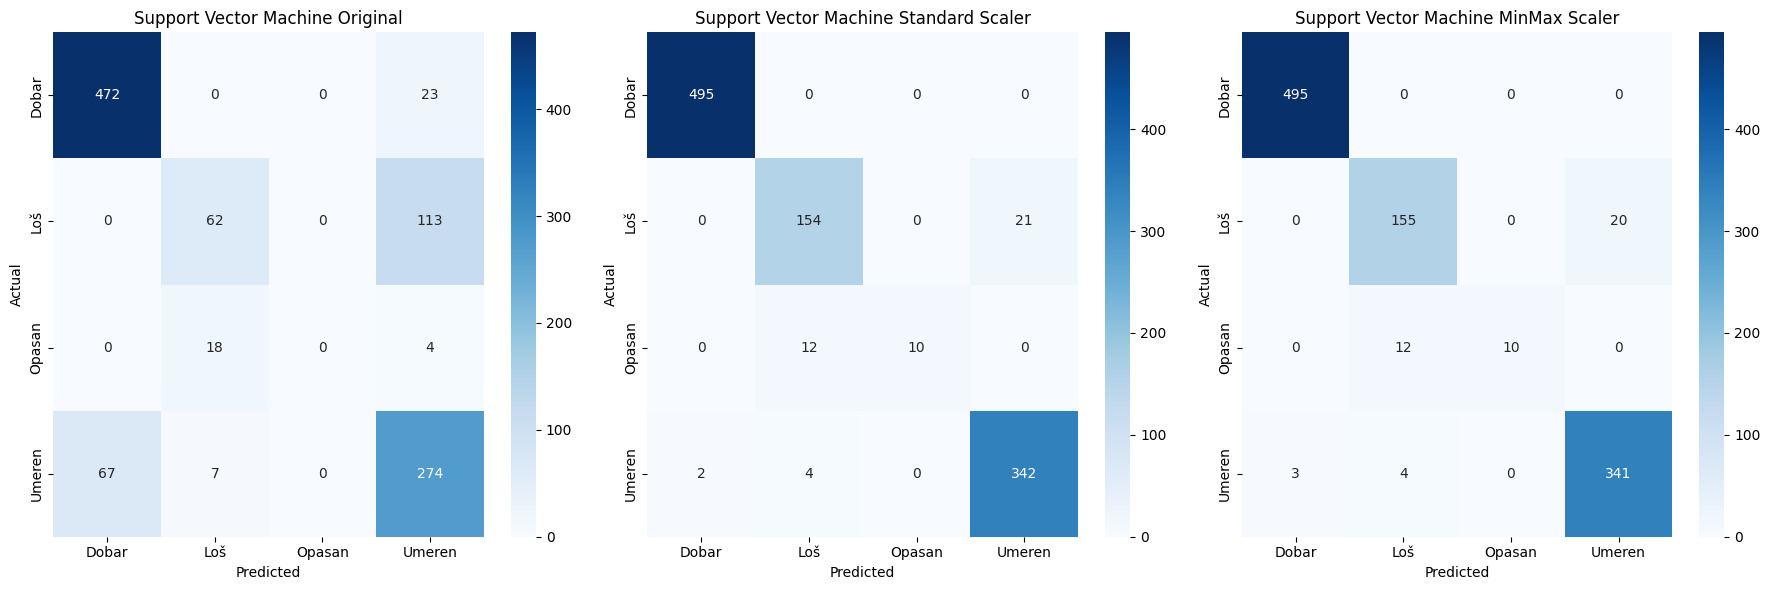

In [32]:
conf_matrixs = {"Support Vector Machine Original":conf_matrix_svc, "Support Vector Machine Standard Scaler":conf_matrix_svc_std,"Support Vector Machine MinMax Scaler":conf_matrix_svc_minmax}
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 3 reda x 1 kolona
axes = axes.flatten()  # flatten to make it easier to index

for idx, (model_name, conf) in enumerate(conf_matrixs.items()):
    #seaborn.heatmap(data=conf,annot=True,cbar=None,cmap='Blues',fmt='.0f')
    seaborn.heatmap(conf, annot=True,cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(model_name)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrixs), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [33]:
showReports(dfs=[report_svc, report_svc_std, report_svc_minmax],titles=['Original','Standard Scaled', 'MinMax Scaled'])

,precision,recall,f1-score,support
Dobar,0.875696,0.953535,0.912959,495.000000
Loš,0.712644,0.354286,0.473282,175.000000
Opasan,1.000000,0.000000,0.000000,22.000000
Umeren,0.661836,0.787356,0.719160,348.000000
macro avg,0.812544,0.523794,0.526350,1040.000000
weighted avg,0.779328,0.776923,0.754814,1040.000000
accuracy,nan,nan,0.776923,nan
,precision,recall,f1-score,support
Dobar,0.995976,1.000000,0.997984,495.000000
Loš,0.905882,0.880000,0.892754,175.000000


* Support Vector Machine je postigao značajno bolje rezultate nakon primene skaliranja nego pri radu sa originalnim skupom podataka
* Odziv kod klasa "Opasan" i "Loš" se dosta povećao u odnosu na primenu ovog modela nad originalnim skupom podataka
* Ostaje problem niskog odziva klase "Opasan", doduše prilikom skaliranja pogrešno je identifikovao kao klasa "Loš" što možemo smatrati da nije velika greška
* *Zaključak:* Model je imao veliko poboljšanje performansi usled skaliranja podataka, mada ostaje problem tačne detekcije klase "Opasan"

### Multinomial Naive Bayes

,precision,recall,f1-score,support
Dobar,0.669824,1.000000,0.802269,495.000000
Loš,1.000000,0.000000,0.000000,175.000000
Opasan,1.000000,0.000000,0.000000,22.000000
Umeren,0.395349,0.341954,0.366718,348.000000
macro avg,0.766293,0.335489,0.292247,1040.000000
weighted avg,0.640523,0.590385,0.504559,1040.000000
accuracy,nan,nan,0.590385,nan


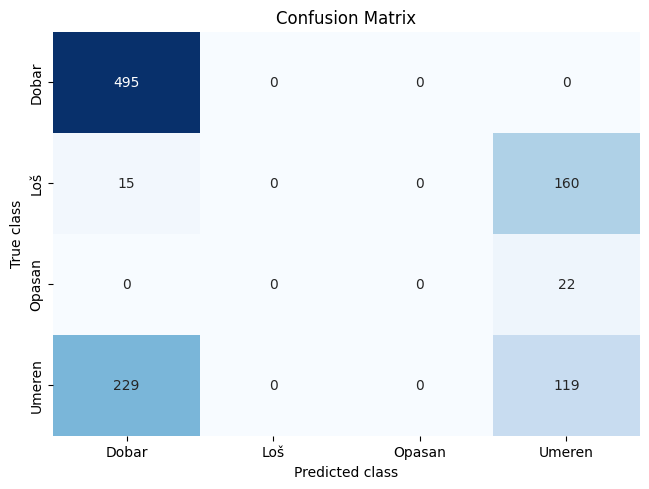

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay


features,target=df_minmax.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

nb = MultinomialNB()
nb.fit(features_train, target_train)

target_predicted = nb.predict(features_test)

report_nb_minmax=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,zero_division=1,output_dict=True))
display(report_nb_minmax)
conf_matrix_nb_minmax=createConfusionMatrix(target_test,target_predicted)

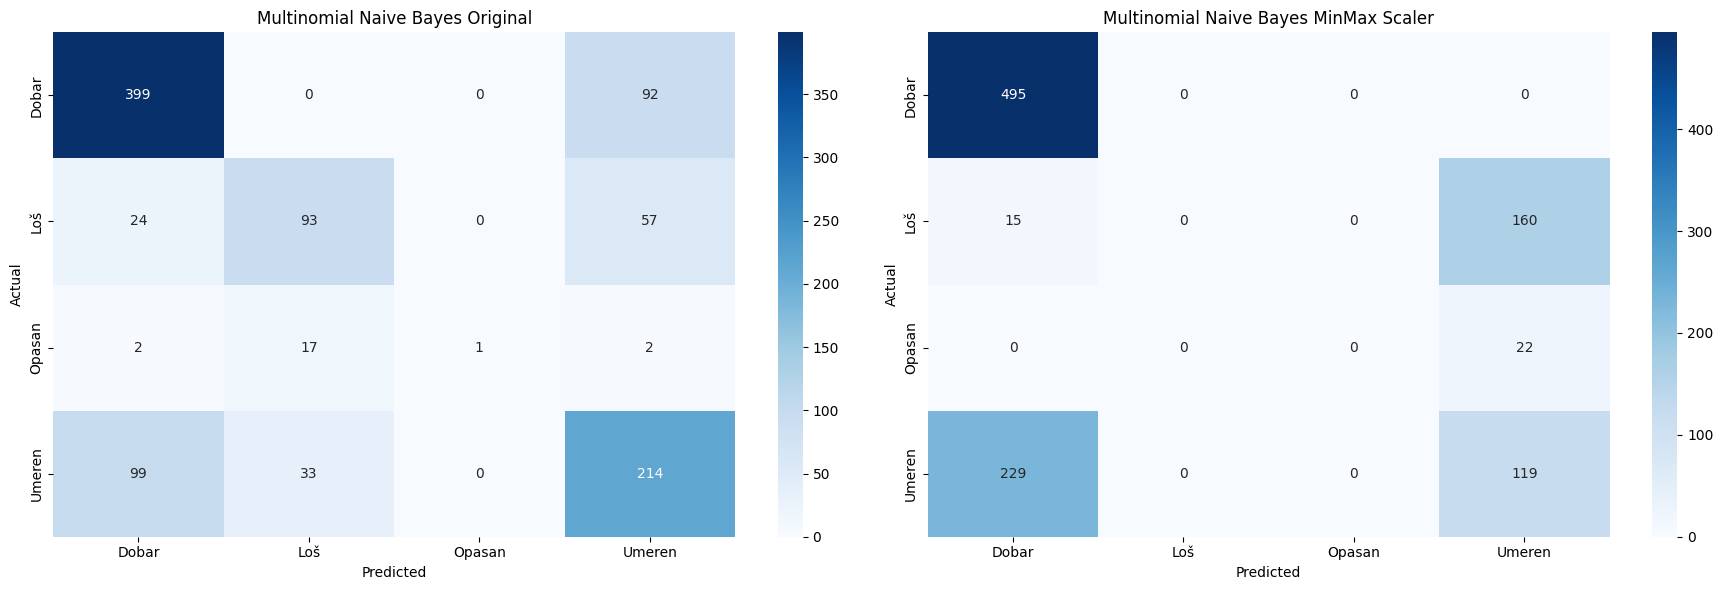

In [35]:
conf_matrixs = {"Multinomial Naive Bayes Original":conf_matrix_nb, "Multinomial Naive Bayes MinMax Scaler":conf_matrix_nb_minmax}
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # 3 reda x 1 kolona
axes = axes.flatten()  # flatten to make it easier to index

for idx, (model_name, conf) in enumerate(conf_matrixs.items()):
    #seaborn.heatmap(data=conf,annot=True,cbar=None,cmap='Blues',fmt='.0f')
    seaborn.heatmap(conf, annot=True,cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(model_name)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrixs), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [36]:
showReports(dfs=[report_nb, report_nb_minmax],titles=['Original','MinMax Scaled'])

,precision,recall,f1-score,support
Dobar,0.761450,0.812627,0.786207,491.000000
Loš,0.650350,0.534483,0.586751,174.000000
Opasan,1.000000,0.045455,0.086957,22.000000
Umeren,0.586301,0.618497,0.601969,346.000000
macro avg,0.749525,0.502765,0.515471,1033.000000
weighted avg,0.689151,0.684414,0.676008,1033.000000
accuracy,nan,nan,0.684414,nan
,precision,recall,f1-score,support
Dobar,0.669824,1.000000,0.802269,495.000000
Loš,1.000000,0.000000,0.000000,175.000000


* Primena Standard Scaler-a nije bila moguća budući da Multinomial Naive Bayes radi samo sa pozitivnim vrednostima
* Odziv i f1 je kod klasa "Opasan" i "Loš" nula, što znači da nije detektovana nijedna objekat ove klase
* *Zaključak:* Ovakav model je do sada dao najlošije rezultate nakon što se primenilo skaliranje skupa podataka

## Zaostali kod

In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold,cross_val_score,KFold

standazier=StandardScaler()

pipeline=make_pipeline(dummy)
kf=KFold(n_splits=10,shuffle=True,random_state=1)
skf=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
cv_results_kf=cross_val_score(pipeline,features,target,cv=kf,scoring='accuracy',n_jobs=-1)
cv_results_skf=cross_val_score(pipeline,features,target,cv=skf,scoring='accuracy',n_jobs=-1)
print(cv_results_kf)
print(cv_results_kf.mean())
print(cv_results_skf)
print(cv_results_skf.mean())


[0.36298077 0.36057692 0.41346154 0.36538462 0.37740385 0.4375
 0.36538462 0.40144231 0.37108434 0.38072289]
0.3835941844300278
[0.34375    0.40384615 0.35576923 0.38221154 0.36778846 0.35817308
 0.39423077 0.39182692 0.39277108 0.33012048]
0.37204877201112135


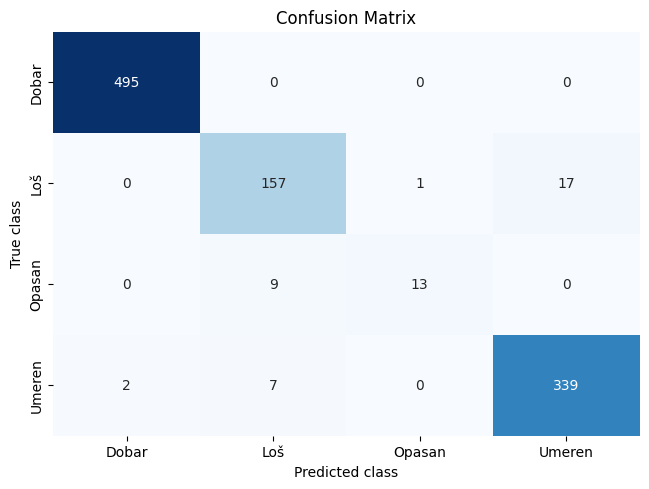

1269


In [38]:
from sklearn.ensemble import RandomForestClassifier
randomForest=RandomForestClassifier()
t= randomForest.fit(features_train,target_train).predict(features_test)
randomForest.score(features_test,target_test)
createConfusionMatrix(target_test,t)
print(t.sum())

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold,KFold,cross_val_score

standazier=StandardScaler()

pipeline=make_pipeline(randomForest)
kf=KFold(n_splits=10,shuffle=True,random_state=1)
skf=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
cv_results_kf=cross_val_score(pipeline,features,target,cv=kf,scoring='accuracy',n_jobs=-1)
cv_results_skf=cross_val_score(pipeline,features,target,cv=skf,scoring='accuracy',n_jobs=-1)
print(cv_results_kf)
print(cv_results_kf.mean())
print(cv_results_skf)
print(cv_results_skf.mean())

[0.96875    0.95913462 0.96634615 0.96394231 0.95192308 0.97596154
 0.96875    0.98076923 0.95903614 0.96626506]
0.9660878127896201
[0.96875    0.97355769 0.95432692 0.95913462 0.96875    0.97836538
 0.96394231 0.96153846 0.97349398 0.9686747 ]
0.967053405931418


### Model - Random Forest

In [40]:
from sklearn.model_selection import train_test_split
x=df.drop(columns='Kvalitet_Vazduha')
y=df['Kvalitet_Vazduha']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf=RandomForestClassifier()
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,41)),
        'min_samples_leaf':list(np.arange(2,41)),'max_features':['sqrt','log2',None],'n_estimators':[400]}



In [42]:
nrf=RandomizedSearchCV(rf,param_distributions=params,random_state=20,cv=10,scoring='accuracy',n_jobs=-1)
nrf.fit(x_train,y_train)
print(nrf.best_params_)
print(nrf.best_score_)

nrf=nrf.best_estimator_

{'n_estimators': 400, 'min_samples_split': np.int64(10), 'min_samples_leaf': np.int64(4), 'max_features': 'log2', 'criterion': 'gini'}
0.9657295850066936


In [43]:
predt=nrf.predict(x_train)
pred=nrf.predict(x_test)

# Nastavak 

In [44]:
minmax_scale=preprocessing.MinMaxScaler(feature_range=(0,1))
df_minmax=df.copy()
for col in df.columns:
    if df[col].dtypes!=object:
        df_minmax[col]=minmax_scale.fit_transform(df[col].values.reshape(-1,1))
print(df_minmax.head())

   Temperatura  Vlažnost     PM2.5      PM10       NO2       SO2        CO  \
0     0.483776  0.304749  0.091873  0.283255  0.292621  0.523810  0.540404   
1     0.439528  0.522427  0.040636  0.194053  0.595420  0.540816  0.500000   
2     0.286136  0.510554  0.471731  0.532081  0.432570  0.639456  0.494949   
3     0.404130  0.040897  0.107774  0.101721  0.155216  0.391156  0.252525   
4     0.386431  0.457784  0.121908  0.253521  0.368957  0.401361  0.181818   

   Blizina_Industrije  Gustina_Populacije  Kvalitet_Vazduha  
0            0.224852            0.194651               1.0  
1            0.207101            0.628529               1.0  
2            0.159763            0.640416               1.0  
3            0.508876            0.539376               0.0  
4            0.603550            0.170877               0.0  


In [45]:
scaller=preprocessing.StandardScaler()
df_std=df.copy()
for col in df.columns:
    if df[col].dtypes!=object:
        df_std[col]=scaller.fit_transform(df[col].values.reshape(-1,1))
print(df_std.head())

   Temperatura  Vlažnost     PM2.5      PM10       NO2       SO2        CO  \
0     0.208528 -0.572424 -0.684376 -0.302789 -0.747481  0.155763  0.852370   
1    -0.057517  0.557506 -0.924151 -0.708591  0.856706  0.255309  0.663646   
2    -0.979808  0.495873  1.093263  0.829185 -0.006050  0.832674  0.640056   
3    -0.270354 -1.942035 -0.609963 -1.128632 -1.475431 -0.620693 -0.492284   
4    -0.376772  0.221951 -0.543819 -0.438056 -0.343064 -0.560965 -0.822550   

   Blizina_Industrije  Gustina_Populacije  Kvalitet_Vazduha  
0           -0.790460           -1.079606          1.336056  
1           -0.878203            1.008238          1.336056  
2           -1.112184            1.065440          1.336056  
3            0.613427            0.579229         -0.907310  
4            1.081389           -1.194008         -0.907310  
